# Trees

Trees are a hierarchal data structure made up of nodes. To be honest, I have never used them outside of competitive programming or interviews, but they seem to be important and relevant somehow. For this workshop, I will be teaching binary trees (with the exception of a Trie) since they are the most common trees.


Some topics that will be covered are:

1. Tree/Node structure
1. Traversals
1. Trie
1. Competitive programming


Run the command below to import the module required to display trees

In [1]:
from graphviz import Digraph

## Tree structure

First, we need to define the structure of a node within a tree. A node will usually have a value and pointers to its children. However, when the tree gets more complicated, it may have more attributes

In [2]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        # Note that there may be different variations in this
        # Some Tree structures may have the self.children
        # in place of left/right (self.children = None)

Now that the node has been declared, it is time to make a tree!

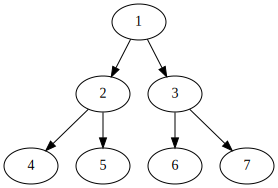

In [3]:
# Hardcoding the tree (bad idea)
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

# Visualizing the tree
def visualizeTree(root):
    # Tree
    tree = Digraph()
    # Append root node
    tree.node(str(root.val))
    # Helper function to append nodes
    def appendChildrenNodes(node):
        # Node doesn't exist leave this thing
        if not node:
            return
        # Left child
        if node.left:
            # Create node
            tree.node(str(node.left.val))
            # Create and append edge
            edge = str(node.val) + str(node.left.val)
            tree.edges([edge])
            # Do the same thing on the left child
            appendChildrenNodes(node.left)
        # Right child
        if node.right:
            # Create node
            tree.node(str(node.right.val))
            # create and append edge
            edge = str(node.val) + str(node.right.val)
            tree.edges([edge])
            # Do the same thing on the right child
            appendChildrenNodes(node.right)
    # Append children
    appendChildrenNodes(root)
    display(tree)

# Visualize the tree
visualizeTree(root)
    

The thing generated above is the general hierarchal structure of a binary tree. On the top of the tree, we have the root node (Node 1). The root node has 2 childiren: Nodes 2 and 3. 

## Tree Traversal

Tree traversal is used when you want to print out the elements of a tree. The three main methods of tree traversal are *inorder*, *preorder*, *postorder*. 

*Inorder traversal* prints in the order of left, parent, right. In the tree example we have above, inorder will yield 4,2,5,1,6,3,7.

*Preorder traversal* prints in the order of parent, left, right. In the tree example, preorder yields 1,2,4,5,3,6,7

*Postorder traversal* prints in the order of right, left, parent. In the example, we get 7,6,3,5,4,2,1

#### Inorder traversal implementation

The inorder traversal implementation can be seen below

In [4]:
def inOrderTraversal(node):
    # if the node
    if not node:
        return
    inOrderTraversal(node.left)
    print(node.val)
    inOrderTraversal(node.right)

inOrderTraversal(root)

4
2
5
1
6
3
7


Looks simple, right? Try implementing your own *preorder* and *postorder* traversal

#### Preorder traversal

Implement the Preorder traversal here!


In [5]:
# Pre order traversal
def preOrderTraversal(node):
    # Put your code here
    pass


preOrderTraversal(root)

#### Postorder traversal

Implement the Postorder traversal here!

In [6]:
# Post order traversal
def postOrderTraversal(node):
    # Put your code here
    pass


postOrderTraversal(root)

# Trie

A Trie is literally a tree of characters/combination of characters. Instead of storing integers, it stores words. Every node in a trie has a value, children (often more than a binary tree), and a marker determining if it is the end of a word

In [7]:
class TrieNode:
    def __init__(self, val, id = 0):
        self.val = val
        self.children = []
        self.end = False
        # For visualization -- ignore this parameter
        self._id = id

Now time to populate the Trie!

In [8]:
# Visualizing the trie
def visualizeTrie(root):
    # Tree
    trie = Digraph()
    # Append root node
    trie.node(str(root._id), str(root.val))
    # Helper function to append nodes
    def appendChildrenNodes(node):
        # Node doesn't exist leave this thing
        if not node:
            return
        # Make node for each child
        for child in node.children:
            # Create node
            trie.node(
                str(child._id), 
                str(child.val), 
                shape=('square' if child.end else 'circle'), 
                width='0.5', 
                height='0.5'
            )
            # Append edge
            trie.edge(str(node._id), str(child._id))
            # Do the same thing on the left child
            appendChildrenNodes(child)
    
    # Append children
    appendChildrenNodes(root)
    display(trie)

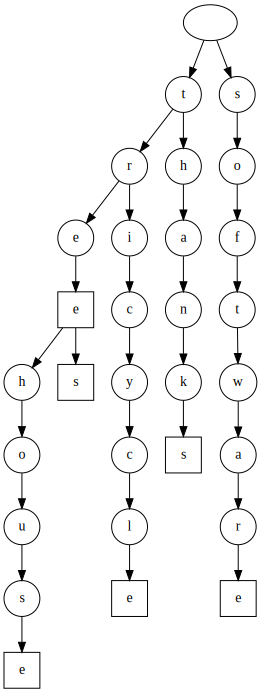

In [9]:
words = ['tree', 'treehouse', 'trees', 'thanks', 'software', 'tricycle']
# words = ['thai', 'is', 'a', 'potato']

# Make root node
trieroot = TrieNode(' ')
# Helper function to populate trie based on word
def addWord(root, word):
    # The end of a word
    if len(word) == 0:
        root.end = True
        return
    # Traverse children to find the next node
    # If child not found then add it
    for child in root.children:
        # Found correct child
        if child.val == word[0]:
            addWord(child, word[1:])
            break
    # If child not found, make new node
    else:
        newNode = TrieNode(word[0])
        root.children.append(newNode)
        addWord(root.children[-1], word[1:])

# Iterate through the words
for word in words:
    # Iterate through characters in the word
    addWord(trieroot, word)

# Give nodes ID's for visualization
def giveID(root, queue):
    elements = getElements(root, queue)
    root._id = 0
    i = 1
    for elem in queue:
        elem._id = i
        i += 1

# Helper function for visualization
def getElements(root, queue):
    for child in root.children:
        queue.append(child)
        giveID(child, queue)
    return queue

giveID(trieroot, [])
visualizeTrie(trieroot)

Observe the trie. What is so special about this data structure?

### Your turn! 

Create a function to insert a new word in the trie without copying my insert word code :)

In [10]:
# Create function here!
def insertWord(root, word):
    # Put your code here!
    pass

insertWord(trieroot, 'sce')

## Competitive programming

This is a competitive programming problem, so it is more challenging than any of the exercises that we have done. You really gotta think outside the box

### [Kitten on a tree](https://open.kattis.com/problems/kitten)

The cat is stuck on a tree. Find the path to the ground.

##### INPUT

**First line**

Integer representing the branch the cat is stuck on

**Next inputs**

Formatted like `a, b1, b2, ...` where the first integer in the line is the parent node and the rest of the integers are child nodes of the parent.

##### OUTPUT

Output the path (from the cat's location to the ground)

*Note: I have given some starting code for this problem for parsing the inputs/etc. However, my code does not parse the inputs for you and you need to build off of the example code*

In [ ]:
# If any of these parsing methods do not help, just comment them out

# Take in a single integer (First line)
catBranch = int(input())

# Take in a line (Ex: 4 3 1 2 into 4, [3,1,2] as seen in Next inputs)
'''
Explanation for this parsing:
input().split(' ') takes in the whole line and convert is to a list of strings
map(int, <array>) typecasts all elements of the list generated into integers
list(map()) typecasts the map object into a list
a, *b = list() means a gets the first element and b gets the rest (in an array)
'''
a, *b = list(map(int, input().split(' ')))


# Suppose your output is an array and you want to format it, use this
# Ex: sample = [2, 3, 4] to '2 3 4'
sample = [2,3,4]
print(' '.join(list(map(str, sample))))